In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [85]:
# loading data
file=pd.read_csv('Price_csv.csv')

In [86]:
file.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [87]:
file.shape

(13320, 9)

In [88]:
file.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [89]:
file.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [90]:
file.groupby('availability')['availability'].agg('count')

availability
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
                        ...  
22-Mar                      3
22-May                     10
22-Nov                      2
Immediate Possession       16
Ready To Move           10581
Name: availability, Length: 81, dtype: int64

In [91]:
file.groupby('location')['location'].agg('count')

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1305, dtype: int64

In [92]:
file.groupby('size')['size'].agg('count')

size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

In [93]:
file.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [94]:
file=file.drop('society',axis=1)

In [95]:
file.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00


###Data cleaning

In [96]:
file.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [97]:
from math import floor

median_balcony=float(floor(file.balcony.median()))
median_bath=float(floor(file.bath.median()))

In [98]:
file.bath=file.bath.fillna(median_bath)
file.balcony=file.balcony.fillna(median_balcony)

In [99]:
file.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [100]:
file=file.dropna()

In [101]:
file.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [102]:
file['size'].value_counts()

2 BHK         5199
3 BHK         4309
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
10 BHK           2
11 Bedroom       2
11 BHK           2
18 Bedroom       1
27 BHK           1
14 BHK           1
16 BHK           1
19 BHK           1
12 Bedroom       1
13 BHK           1
43 Bedroom       1
Name: size, dtype: int64

In [103]:
#droppig BHK,Bedroom to BHK
file['BHK']=file['size'].apply(lambda x: int(x.split(' ')[0]))

In [104]:
file=file.drop('size',axis=1)

In [105]:
file.head(2)

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4


In [106]:
file['BHK'].value_counts()

2     5528
3     4856
4     1417
1      656
5      356
6      221
7      100
8       89
9       54
10      14
11       4
27       1
14       1
43       1
18       1
12       1
13       1
16       1
19       1
Name: BHK, dtype: int64

In [107]:
file.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [108]:
def isfloat(x):
  try:
    float(x)
  except:
    return False
  return True

In [109]:
file[-file['total_sqft'].apply(isfloat)]

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
30,Super built-up Area,19-Dec,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,20-Feb,Devanahalli,3010 - 3410,2.0,2.0,192.000,4
81,Built-up Area,18-Oct,Hennur Road,2957 - 3450,2.0,2.0,224.500,4
122,Super built-up Area,18-Mar,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Ready To Move,Harlur,1200 - 1470,2.0,0.0,72.760,2
13240,Super built-up Area,Ready To Move,Devanahalli,1020 - 1130,2.0,2.0,52.570,1
13265,Super built-up Area,20-Sep,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [110]:
def string_to_num(x):
  token=x.split('-')
  if len(token)==2:
    val=(float(token[0])+float(token[1]))/2
    return val
  try:
    return float(x)
  except:
    return None

In [111]:
file['sqft']=file.total_sqft.apply(string_to_num)

In [112]:
file=file.drop('total_sqft',axis=1)

In [113]:
file.head(2)

,area_type,availability,location,bath,balcony,price,BHK,sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,2,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0


In [114]:
file.isnull().sum()

area_type        0
availability     0
location         0
bath             0
balcony          0
price            0
BHK              0
sqft            46
dtype: int64

In [115]:
file=file.dropna()

In [116]:
file.isna().sum()

area_type       0
availability    0
location        0
bath            0
balcony         0
price           0
BHK             0
sqft            0
dtype: int64

###Feature Engg

In [117]:
file_1=file.copy()

In [118]:
file_1['price_per_sqft']=(file_1['price']*100000)/file_1['sqft']

In [119]:
file_1.head()

,area_type,availability,location,bath,balcony,price,BHK,sqft,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000


In [120]:
#unique values of locations
len(file_1.location.unique())

1298

In [121]:
file_1.location.value_counts()

Whitefield              537
Sarjapur  Road          397
Electronic City         302
Kanakpura Road          271
Thanisandra             233
                       ... 
Zuzuvadi                  1
Off Bannergatta road      1
Jeevanhalli               1
Shauhardha Layout         1
Mullur                    1
Name: location, Length: 1298, dtype: int64

In [122]:
file_1.location=file_1.location.apply(lambda x: x.strip())

In [123]:
file_1.location.value_counts()

Whitefield                        538
Sarjapur  Road                    397
Electronic City                   304
Kanakpura Road                    271
Thanisandra                       236
                                 ... 
Gangondanahalli                     1
asha township, off hennur road      1
Annasandrapalya                     1
Ramamohanapuram                     1
Mullur                              1
Name: location, Length: 1287, dtype: int64

In [124]:
location_val=file_1.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [125]:
location_val

location
Whitefield              538
Sarjapur  Road          397
Electronic City         304
Kanakpura Road          271
Thanisandra             236
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [126]:
print(len(location_val[location_val<=10]))

1047


In [127]:
loc_less_10=location_val[location_val<=10]

In [128]:
file_1.location=file_1.location.apply(lambda x: 'others' if x in loc_less_10 else x)

In [129]:
file_1.location.value_counts()

others                2873
Whitefield             538
Sarjapur  Road         397
Electronic City        304
Kanakpura Road         271
                      ... 
Narayanapura            11
Banjara Layout          11
Marsur                  11
Kodigehalli             11
Pattandur Agrahara      11
Name: location, Length: 241, dtype: int64

In [130]:
file_1.head(5)

,area_type,availability,location,bath,balcony,price,BHK,sqft,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000


In [131]:
file_1.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       '19-May', '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct',
       '21-Jan', '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul',
       '21-Nov', '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep',
       '21-Aug', '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun',
       '17-Feb', '20-Nov', '20-Jul', '16-Sep', '15-Oct', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

In [132]:
dates=file_1.groupby('availability')['availability'].agg('count').sort_values(ascending=True)

In [133]:
dates

availability
14-Jul               1
14-Nov               1
15-Aug               1
15-Dec               1
15-Jun               1
                 ...  
18-Aug             199
18-Apr             271
18-May             294
18-Dec             306
Ready To Move    10541
Name: availability, Length: 80, dtype: int64

In [134]:
dates_not_ready=dates[dates<=10000]

In [135]:
file_1.availability=file_1.availability.apply(lambda x: 'not ready' if x in dates_not_ready else x)

In [136]:
file_1.availability.unique()

array(['not ready', 'Ready To Move'], dtype=object)

In [137]:
file_1.head()

,area_type,availability,location,bath,balcony,price,BHK,sqft,price_per_sqft
0,Super built-up Area,not ready,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000


In [138]:
file_1.groupby('area_type')['area_type'].agg('count').sort_values(ascending=True)

area_type
Carpet  Area              86
Plot  Area              1991
Built-up  Area          2402
Super built-up  Area    8778
Name: area_type, dtype: int64

###Removing Outliners

In [139]:
len(file_1.sqft.unique())

1996

In [140]:
#we will remove the rows who have 1 room less than 300 sqrt
file_2=file_1[-(file_1.sqft/file_1.BHK<300)]

In [141]:
print(len(file_2),len(file_1))

12513 13257


In [142]:
file_2.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [143]:
#since there is wide range of varity in btw min & max.We will remove he extreme values to decrease the deviation
def remove_out(x):
  df_out=pd.DataFrame()
  for key,sub in x.groupby('location'):
    m=np.mean(sub.price_per_sqft)
    sd=np.std(sub.price_per_sqft)
    df_reduced=sub[((sub.price_per_sqft>(m-sd)) & (sub.price_per_sqft<(m+sd)))]
    df_out=pd.concat([df_out,df_reduced])
  return df_out
file_3=remove_out(file_2)

In [144]:
print(len(file_2),len(file_3))

12513 10288


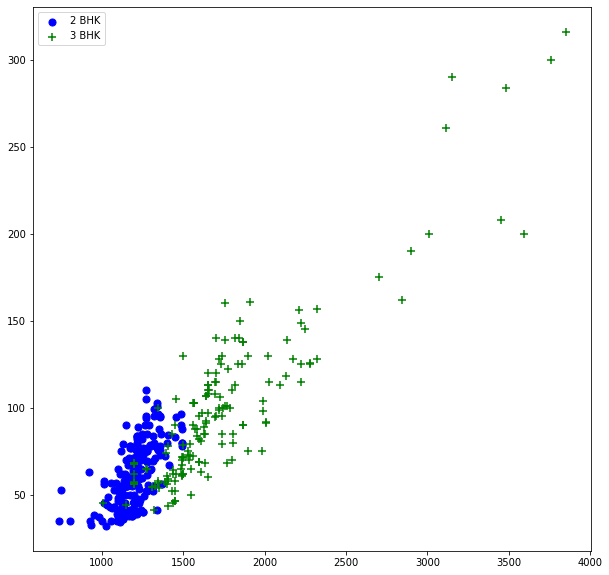

In [145]:
def plot_chart(df,location):
  bhk2=df[(df.location==location)&(df.BHK==2)]
  bhk3=df[(df.location==location)&(df.BHK==3)]
  plt.figure(figsize=(10,10))
  plt.scatter(bhk2.sqft,bhk2.price,color='blue',label='2 BHK',s=50)
  plt.scatter(bhk3.sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
  plt.legend()
  plt.show()
plot_chart(file_3,'Whitefield')

In [158]:
def remove_outliners(df):
  ex_indices=np.array([])
  for location,location_df in df.groupby('location'):
    bhk_stat={}
    for bhk,bhk_df in location_df.groupby('BHK'):
      bhk_stat[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby('BHK'):
      stats=bhk_stat.get(bhk-1)
      if stats and stats['count']>5:
        ex_indices = np.append(ex_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  df_=df.drop(ex_indices, axis='index')
  return df_
file_4=remove_outliners(file_3)

In [159]:
print(len(file_3),len(file_4))

10288 7342


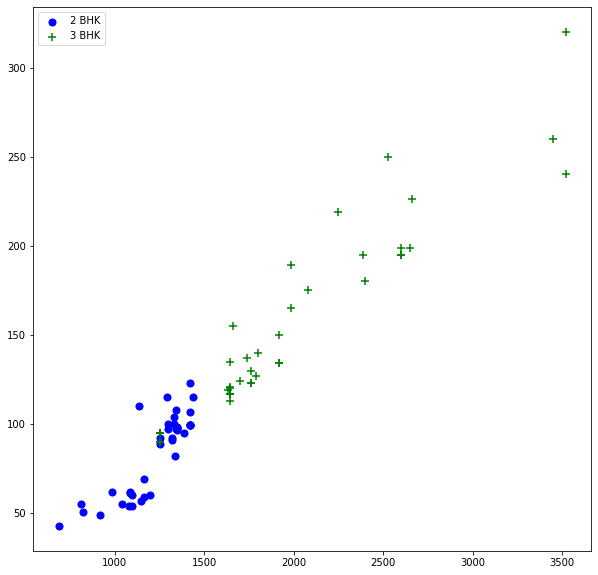

In [160]:
plot_chart(file_4,'Hebbal')

In [161]:
#removing the rows who have bath greater than +2 in BHK
file_5=file_4[(file_4.bath<file_4.BHK+2)]
print(len(file_5),len(file_4))

7264 7342


In [162]:
file_5.head()

,area_type,availability,location,bath,balcony,price,BHK,sqft,price_per_sqft
210,Super built-up Area,not ready,1st Block Jayanagar,4.0,1.0,428.0,4,2850.0,15017.543860
848,Super built-up Area,not ready,1st Block Jayanagar,3.0,2.0,194.0,3,1630.0,11901.840491
2152,Super built-up Area,Ready To Move,1st Block Jayanagar,2.0,3.0,235.0,3,1875.0,12533.333333
7138,Built-up Area,not ready,1st Block Jayanagar,2.0,0.0,130.0,3,1200.0,10833.333333
7358,Super built-up Area,not ready,1st Block Jayanagar,2.0,2.0,148.0,2,1235.0,11983.805668


###Model Building

In [163]:
file_6=file_5.copy()

In [164]:
file_6.head()

,area_type,availability,location,bath,balcony,price,BHK,sqft,price_per_sqft
210,Super built-up Area,not ready,1st Block Jayanagar,4.0,1.0,428.0,4,2850.0,15017.543860
848,Super built-up Area,not ready,1st Block Jayanagar,3.0,2.0,194.0,3,1630.0,11901.840491
2152,Super built-up Area,Ready To Move,1st Block Jayanagar,2.0,3.0,235.0,3,1875.0,12533.333333
7138,Built-up Area,not ready,1st Block Jayanagar,2.0,0.0,130.0,3,1200.0,10833.333333
7358,Super built-up Area,not ready,1st Block Jayanagar,2.0,2.0,148.0,2,1235.0,11983.805668


In [166]:
#convert categorical location to numerical get dummies
dummy_col=pd.get_dummies(file_6.location).drop('others',axis='columns')
file_6=pd.concat([file_6,dummy_col],axis='columns')

In [167]:
#convert categorical availability  to numerical get dummies
dummy_col=pd.get_dummies(file_6.availability).drop('not ready',axis='columns')
file_6=pd.concat([file_6,dummy_col],axis='columns')

In [173]:
#convert categorical area_type  to numerical get dummies
dummy_col=pd.get_dummies(file_6.area_type).drop('Super built-up  Area',axis='columns')
file_6=pd.concat([file_6,dummy_col],axis='columns')

In [174]:
file_6=file_6.drop(['location','availability','area_type'],axis='columns')

In [176]:
file_6=file_6.drop(['price_per_sqft'],axis='columns')

In [177]:
file_6.head()

,bath,balcony,price,BHK,sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,...,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Ready To Move,Built-up Area,Carpet Area,Plot Area
210,4.0,1.0,428.0,4,2850.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
848,3.0,2.0,194.0,3,1630.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2152,2.0,3.0,235.0,3,1875.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7138,2.0,0.0,130.0,3,1200.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7358,2.0,2.0,148.0,2,1235.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [178]:
file_6.shape

(7264, 249)

In [179]:
X=file_6.drop('price',axis='columns')
y=file_6['price']

In [180]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

In [196]:
#creatinf function for gridsearch cv
def best_model(X,y):
  models={
       'linear regression':{
           'model':LinearRegression(),
           'parameters':{
               'normalize':[True,False]
           }
       },
       'decision_tree':{
           'model':DecisionTreeRegressor(),
           'parameters':{
              'criterion': ['mse', 'friedman_mse'],
              'splitter': ['best', 'random']
           }
       },
       'lasso': {
            'model': Lasso(),
            'parameters': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
     }
  score=[]
  cv_X_y=ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
  for model_nam,model_param in models.items():
    gs=GridSearchCV(model_param['model'],model_param['parameters'],cv=cv_X_y,return_train_score=False)
    gs.fit(X,y)
    score.append({'model': model_nam,
            'best_parameters': gs.best_params_,
            'accuracy': gs.best_score_
        })
  return pd.DataFrame(score,columns=['model','best_parameters','accuracy'])
best_model(X,y)

,model,best_parameters,accuracy
0,linear regression,{'normalize': True},0.845329
1,decision_tree,"{'criterion': 'friedman_mse', 'splitter': 'ran...",0.718134
2,lasso,"{'alpha': 1, 'selection': 'cyclic'}",0.687893


In [197]:
#since Linear regressiokn has the highest accuracy
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te=train_test_split(X,y,test_size=0.2,random_state=42)


In [198]:
lin_reg=LinearRegression(normalize=True)
lin_reg.fit(X_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [199]:
lin_reg.score(X_te,y_te) 

0.8577698814499637